In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from PIL import Image
import math

In [94]:
#following code is to make heatmap from dataframe produced with "df_for_heatmap.ipynb"

inputdir="C:\\Users\\sunad\\Desktop\\exp210919_cantas\\tissue_segmentation_220305\\segmentation\\96h\\for_graph"
outputdir =f"{inputdir}\\output\\heatmap"
tissue_number = "tissue1"
df = pd.read_csv(f"{inputdir}\\output\\{tissue_number}_amplicon_density_roi.csv")
df = df.rename(columns={'Unnamed: 0': 'gene'})
df_i = df.set_index("gene")
df_ii = df_i.drop('distance_pxl', axis=0)
df_iii = df_ii.drop('distance_micro-m', axis=0)

df_final = np.log2(df_iii + 1)
df_final

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,...,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25
gene,,,,,,,,,,,,,,,,,,,,,
ALDH1A2,2.915729,2.079558,3.109547,3.404576,3.167631,4.203575,4.653619,4.473431,4.948417,4.808876,...,0.652956,0.000000,0.926984,0.377414,0.000000,0.000000,0.382905,0.380955,0.000000,0.389207
CYP26A1,2.046399,0.666018,0.666310,0.661009,1.472280,1.871061,1.133279,2.099886,2.466412,1.766649,...,2.148712,3.273438,2.809136,3.031442,2.463131,3.641566,4.195819,4.786277,4.351392,4.244967
FGF17,0.650052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.894200,1.663285,2.001558,1.134907,1.890825,3.742707,4.477517,4.257931,4.659115,4.358215
FGF3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.363107,0.695324,0.678851,0.000000,0.679769,0.000000,0.382905,0.931010,0.000000,0.000000
FGF4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.652956,1.514877,0.378991,0.923745,0.928142,1.491935,0.935003,1.143271,0.382194,0.695412
FGF8,0.361333,0.371105,0.911126,0.000000,0.916324,0.373325,0.000000,1.318450,0.930045,1.633337,...,1.717888,2.139426,2.610546,2.921863,3.704613,4.113861,4.354293,4.409230,4.285601,4.069817
HES7,0.000000,0.000000,0.371285,0.904412,1.126356,0.669635,1.994189,1.134342,0.930045,1.633337,...,1.586574,2.965643,3.767459,3.662368,4.403477,4.564271,3.649691,2.387044,2.820986,2.496999
MEOX1,3.118449,3.531115,3.603260,3.191662,2.726737,3.344174,3.516484,3.822427,4.034805,3.701896,...,0.363107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MESP2,0.000000,0.000000,0.000000,0.368035,0.000000,0.000000,0.000000,0.377175,0.000000,0.378876,...,0.000000,0.389153,0.678851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.389207


In [101]:
inputdir="C:\\Users\\sunad\\Desktop\\exp210919_cantas\\tissue_segmentation_220305\\segmentation\\96h\\for_graph"
outputdir =f"{inputdir}\\output\\heatmap"
df = pd.read_csv(f"{inputdir}\\output\\average_heatmap_amplicon_density_roi.csv")
df = df.rename(columns={'Unnamed: 0': 'gene'})
df_i = df.set_index("gene")

df_final = np.log2(df_i + 1)
df_final

,-180,-150,-120,-90,-60,-30,0,30,60,90,...,150,180,210,240,270,300,330,360,390,420
gene,,,,,,,,,,,,,,,,,,,,,
ALDH1A2,-0.001611,0.164098,0.625762,0.290510,0.893290,2.134722,3.548418,3.908361,4.109167,4.179618,...,4.747409,4.393310,4.336270,4.118584,3.737439,3.830234,3.924866,3.624909,2.903723,2.529477
CYP26A1,3.856619,3.102541,2.876747,3.439076,3.101552,2.562163,1.436426,1.699965,0.822252,0.947919,...,1.631620,1.767887,1.381915,1.693406,1.342999,0.813748,0.492660,0.752920,0.833849,1.322899
FGF17,3.793468,2.429628,2.269380,2.250619,1.747441,1.987378,1.261358,0.633424,0.385004,0.070798,...,0.014537,0.000000,0.247916,0.125578,0.000000,0.018698,0.072542,0.000000,0.081542,0.210277
FGF3,1.435259,0.990477,0.495334,0.333629,0.133873,0.672841,0.611362,0.293398,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FGF4,1.600885,0.696583,0.881387,0.803662,0.249922,0.135037,0.192145,0.000000,0.000000,0.000000,...,-0.023591,0.109964,0.022673,0.000000,0.000000,0.000000,0.000000,0.000000,0.081542,0.060841
FGF8,3.957857,3.533004,3.045492,2.813787,2.220130,2.289695,1.469111,1.270566,1.217388,0.662292,...,0.904441,1.240349,0.571118,0.633865,0.809778,0.383605,0.610292,0.373190,0.284999,0.414420
HES7,3.859951,4.120806,3.678452,3.066589,2.375492,1.535637,1.608009,1.527138,1.450316,1.140511,...,1.028822,1.186038,1.329479,0.818989,0.945989,0.808663,0.548638,0.477271,0.198154,0.060841
MEOX1,0.000000,0.000000,0.265279,0.074800,0.743256,2.110768,2.919574,3.272834,3.094756,2.822410,...,3.136554,2.698938,2.666204,2.742397,2.672696,3.033090,3.302139,3.237419,3.080852,2.744458
MESP2,0.075338,0.033025,0.211896,0.237239,0.151834,1.075611,1.980106,0.786346,0.611784,0.362359,...,0.003681,0.128174,0.000000,0.000000,0.081282,0.277743,0.053458,0.000000,0.000000,0.000000


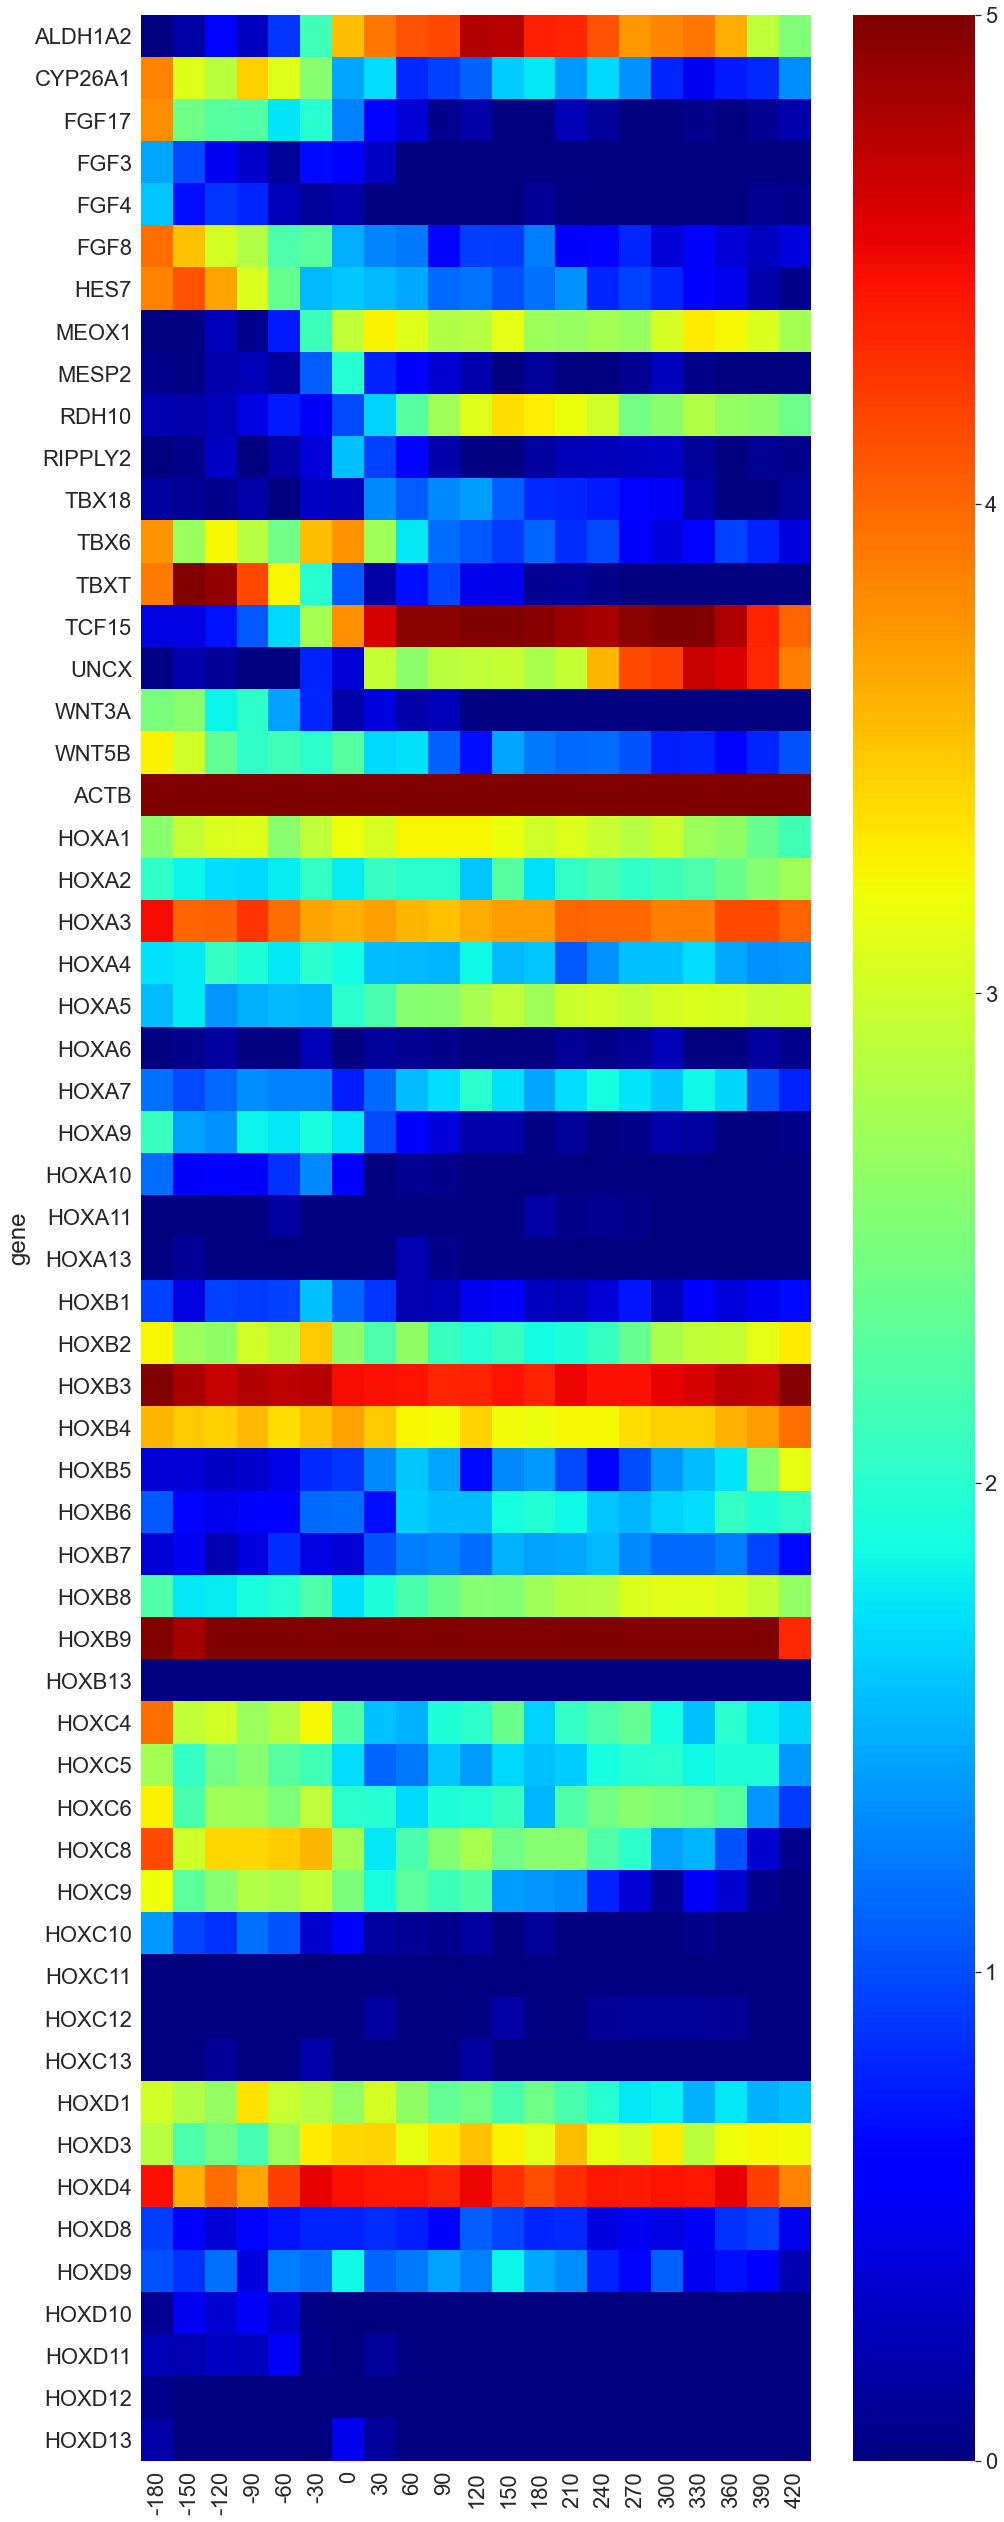

In [102]:
fig, ax = plt.subplots(figsize = (15, 45))
sns.set(font_scale = 2, font = "arial")
sns.heatmap(df_final, vmax = 5, vmin = 0, cmap = "jet")

plt.savefig(f"{outputdir}\\96h_average_density_distance")